## Practical Case 3: Crime Data

In the data/crime_data.csv there are the crimes number for each 100.000 inhabitants in each state of USA, as well as the percentage of urban population. The crimes have been grouped like: Murder, Assault and Rape. Segment that dataset using k-means and get the centroids of each cluster and the states list of each cluster.

#### Import Data

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read the files 
crimes = pd.read_csv("crime_data.csv")

In [52]:
crimes.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

The exercise requires us to segment the data, so we will only need the numeric columns. For that, we will remove the 'State' column. 

In [78]:
df = crimes.drop('State', axis =1)
df.head()

Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0
3     8.8      190        50  19.5
4     9.0      276        91  40.6

Due to there are more of two dimensions, for selecting the number of clusters, we have to use the Silhouette method:

In [79]:
# blobs       -> data
# figure_name -> figure name
# max_k       -> maximum of clusters
# n_init      -> maximum number which the algorithm will be executed
def plot_silhouette(data, figure_name, max_k = 10, n_init = 10):
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans
    #from sklearn.spatial.distance import cdist
    
    silhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(data)
        silhouette_avgs.append(silhouette_score(data, kmean.labels_))
        
    plt.plot(range(2, max_k), silhouette_avgs)
    plt.xlabel('k')
    plt.title(figure_name)

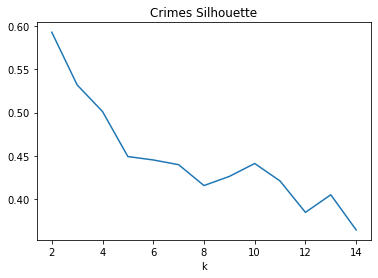

In [80]:
plot_silhouette(df, 'Crimes Silhouette', 15, 10)

With that result, we can say the maximum number of clusters is 8. So, let's use K-Means algorithm with 8 clusters:

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters = 8, n_init = 10, random_state = 1).fit(df)

clusters = kmeans.predict(df)

#print the cluster of each mammals

for c in range(max(clusters)+1) :
    print('Cluster', c)
    print(crimes['State'][clusters == c])
    print('\n')

Cluster 0
3      Arkansas
5      Colorado
9       Georgia
24     Missouri
41    Tennessee
42        Texas
Name: State, dtype: object


Cluster 1
10           Hawaii
14             Iowa
18            Maine
22        Minnesota
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object


Cluster 2
8            Florida
32    North Carolina
Name: State, dtype: object


Cluster 3
1             Alaska
23       Mississippi
39    South Carolina
Name: State, dtype: object


Cluster 4
6      Connecticut
11           Idaho
13         Indiana
15          Kansas
16        Kentucky
25         Montana
26        Nebraska
34            Ohio
37    Pennsylvania
43            Utah
Name: State, dtype: object


Cluster 5
0       Alabama
7      Delaware
12     Illinois
17    Louisiana
21     Michigan
27       Nevada
31     New York
Name: State, dtype: object


Cluster 6
2        Arizona
4     California
19      Maryland
30